# PROJETO MICRODADOS VACINAÇÃO PYTHON

Objetivo: Realizar analise exploratória dos dados de vacinação através da base de dados disponibilizada pela iniciativa  base dos dados com a linguagem python

Bibliotecas a serem utilizadas:

In [200]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

Sobre o dataset:

Utilizando linguagem SQL filtramos do dataset original apenas 700mil registros para melhorar nossa eficiência computacional. Por isto, este dataset representa apenas uma parte dos dados originais. Aqui, cada linha representa uma dose aplicada em um indivíduo. Os dados possuem informações sobre o imunizante aplicado, a categoria e grupo de comorbidade, data e local de aplicação.

O link para o datalake público pode ser acessado aqui: https://basedosdados.org/dataset/br-ms-vacinacao-covid19?bdm_table=microdados_vacinacao

In [201]:
dados = pd.read_csv('C:/Users/Adauto/OneDrive/Área de Trabalho/Ciencia de Dados/vacinacao.csv', low_memory = False) 

Verificando a estrutura do dataset:

In [202]:
dados.shape 

(700000, 15)

Primeira impressão dos dados:

In [203]:
dados.head()

,sigla_uf,id_documento,id_paciente,id_estabelecimento,grupo_atendimento,categoria,lote,nome_fabricante,referencia_fabricante,data_aplicacao,dose,vacina,data_importacao_rnds,horario_importacao_rnds,sistema_origem
0,SC,1bf5c354-e681-477a-b0f5-00c0b6442d13-i0b0,4221bb5df1b895b7223c1031f2f71377bbb337f5b50760...,2622726,926.0,9.0,FJ4187,PFIZER,Organization/46070868003699,2021-11-06,2ª Dose,87,NaN,NaN,NaN
1,MG,abd53ecf-0891-41d3-b0c6-e0bb9ef52959-i0b0,64a596936ac94945399fa2688c4e0dec00b22809047f7a...,9686940,201.0,2.0,210455,SINOVAC/BUTANTAN,SINOVAC-BUTANTAN/61189445000156,2021-09-16,1ª Dose,86,NaN,NaN,NaN
2,MG,d5ac0a0c-b73e-409c-9ee5-537365be70a6-i0b0,4d965708eb22efcd242dda496b77716080c01ab9038fd2...,2121522,201.0,2.0,1855836,JANSSEN,Organization/30587,2021-12-22,Reforço,88,NaN,NaN,NaN
3,BA,d95291be-217c-4415-a02d-9155696d743d-i0b0,95a52c776c26e81f4e856f4c2aeafc35b0c507daeea2b2...,7222122,926.0,9.0,ABW4735,ASTRAZENECA/FIOCRUZ,FIOCRUZ - FUNDACAO OSWALDO CRUZ (OXFORD)/33655...,2021-06-08,1ª Dose,85,NaN,NaN,NaN
4,PE,14714eb2-c211-429c-b181-41751241253f-i0b0,0319447ca18ff545f498ee458312ce720e037a31f78780...,2630540,201.0,2.0,210371,SINOVAC/BUTANTAN,Organization/152,2021-12-20,2ª Dose,86,NaN,NaN,NaN


Verificando tipagem dos dados:

In [204]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   sigla_uf                 700000 non-null  object 
 1   id_documento             700000 non-null  object 
 2   id_paciente              700000 non-null  object 
 3   id_estabelecimento       700000 non-null  int64  
 4   grupo_atendimento        698606 non-null  float64
 5   categoria                698606 non-null  float64
 6   lote                     700000 non-null  object 
 7   nome_fabricante          700000 non-null  object 
 8   referencia_fabricante    445574 non-null  object 
 9   data_aplicacao           700000 non-null  object 
 10  dose                     700000 non-null  object 
 11  vacina                   700000 non-null  int64  
 12  data_importacao_rnds     0 non-null       float64
 13  horario_importacao_rnds  0 non-null       float64
 14  sist

Tratando coluna data:

In [205]:
dados['data_aplicacao'] = pd.to_datetime(dados['data_aplicacao'])

In [206]:
#Verificando perído do dataset

periodo_inicial = dados['data_aplicacao'].min()
periodo_final = dados['data_aplicacao'].max()
print(f'O período abrange de {periodo_inicial} até {periodo_final}')

O período abrange de 1990-01-04 00:00:00 até 2022-01-14 00:00:00


In [207]:
# verificando registros suspeitos de data errada

dados['data_aplicacao'].loc[dados['data_aplicacao'] < '2019']

14130   1990-01-04
Name: data_aplicacao, dtype: datetime64[ns]

In [208]:
# Provavelmente trata-se de erro de digitação

dados.loc[14130]

sigla_uf                                                                  PB
id_documento                       3940cd34-c02e-471d-a22c-98dbe53d63b7-i0b0
id_paciente                795e4ba3c3d6ad25eeff6fe3672798e035a2428acd11e9...
id_estabelecimento                                                   7979436
grupo_atendimento                                                      502.0
categoria                                                                5.0
lote                                                                  EY0575
nome_fabricante                                                       PFIZER
referencia_fabricante                            Organization/46070868001998
data_aplicacao                                           1990-01-04 00:00:00
dose                                                                 1ª Dose
vacina                                                                    87
data_importacao_rnds                                                     NaN

In [209]:
# Excluindo registro

dados  = dados.drop(14130)

In [210]:
dados.shape

(699999, 15)

In [211]:
# Conferindo resultado

periodo_inicial = dados['data_aplicacao'].min()
periodo_final = dados['data_aplicacao'].max()
print(f'O peírodo abrange de {periodo_inicial} até {periodo_final}')

O peírodo abrange de 2020-03-23 00:00:00 até 2022-01-14 00:00:00


Verificando NA's

In [212]:
dados.isnull().sum() 

# AS principais informações de dose, nome do fabricante e estado de aplicação não irão necessitar de tratamento de Na's.

sigla_uf                        0
id_documento                    0
id_paciente                     0
id_estabelecimento              0
grupo_atendimento            1394
categoria                    1394
lote                            0
nome_fabricante                 0
referencia_fabricante      254426
data_aplicacao                  0
dose                            0
vacina                          0
data_importacao_rnds       699999
horario_importacao_rnds    699999
sistema_origem             699999
dtype: int64

Verificando as colunas existentes:

In [213]:
dados.columns.values 

array(['sigla_uf', 'id_documento', 'id_paciente', 'id_estabelecimento',
       'grupo_atendimento', 'categoria', 'lote', 'nome_fabricante',
       'referencia_fabricante', 'data_aplicacao', 'dose', 'vacina',
       'data_importacao_rnds', 'horario_importacao_rnds',
       'sistema_origem'], dtype=object)

# Tratamento dos Dados

In [214]:
quantidade_vacinas_uf = dados['sigla_uf'].value_counts() ## values_counts() : conta quantos registros tem por colunas
print(quantidade_vacinas_uf)

# leitura: Em SP foram aplicadas 172.125 vacinas (maior aplicações)
# Roraima foram aplicadas as menores quantidades de vacinas 1.484


SP    172125
MG     72881
RJ     58225
BA     44852
RS     41579
PR     40379
PE     29079
CE     28070
SC     25456
GO     23468
PA     21281
MA     18538
ES     14313
PB     13342
RN     11222
MT     10934
AM     10854
DF     10542
PI     10428
AL      9962
MS      9877
SE      6823
RO      5320
TO      4400
AC      2591
AP      1974
RR      1484
Name: sigla_uf, dtype: int64


Outra forma de verificar os valores exremos pode ser feita da seguinte forma:

In [215]:
maiores_aplicacoes = dados['sigla_uf'].value_counts().max()
menores_aplicacoes = dados['sigla_uf'].value_counts().min()

print(f'O Estado que mais aplicou doses foi SP com {maiores_aplicacoes} doses e quem menos aplicou foi RR com {menores_aplicacoes} doses')

O Estado que mais aplicou doses foi SP com 172125 doses e quem menos aplicou foi RR com 1484 doses


Substituindo valores das LINHAS pelas categorias corretas.

O objetivo aqui é reorganizar melhor os dados e renomear os registros que versam sobre doses de reforço ou 1º dose para mesma nomeclatura.

In [216]:
dados.loc[dados['dose'] == 'Dose Adicional', ['dose']] = "Reforço"
dados.loc[dados['dose'] == '1º Reforço', ['dose']] = "Reforço"
dados.loc[dados['dose'] == 'Única', ['dose']] = "Dose Única"
dados.loc[dados['dose'] == 'Dose Inicial', ['dose']] = "1ª Dose"

print(dados['dose'].unique()) # verificando resultado

['2ª Dose' '1ª Dose' 'Reforço' 'Dose Única' '4ª Dose' '3ª Dose']


Na base o imunizante Astrazeneca aparece com duas nomeclaturas diferentes e iremos tratá-ló da seguinte forma:

In [217]:
dados.loc[dados['nome_fabricante'] == 'ASTRAZENECA', ['nome_fabricante']] = "ASTRAZENECA/FIOCRUZ" 

print(dados['nome_fabricante'].unique()) # verificando resultado


['PFIZER' 'SINOVAC/BUTANTAN' 'JANSSEN' 'ASTRAZENECA/FIOCRUZ']


Decifrando coluna categoria: o objetivo é renomear coluna categoria de números para texto 

1. Criar objeto dicionario com chave-valor e selecionar dataframe com colunas de interesse

2. Aqui foi necessário utilizar o dicionário dos dados originais que contém o mapa das informações do dataset

In [218]:
categoriadic =  {
    1 : 'Comorbidades',
    2 : 'Faixa Étaria',
    3 : 'Pessoas de 60 anos ou mais institucionalizadas',
    4 : 'Forças Armadas (membros ativos)',
    5 : 'Forças de Segurança e Salvamento',
    6 : 'Povos e Comunidades Tradicionais',
    7 : 'Povos Indígenas',
    8: 'Trabalhadores da Educação',
    9 : 'Trabalhadores de Saúde',
    10 : 'outros',
    11 : 'Pessoas com Deficiência',
    12 : 'outros',
    13 : 'Trabalhadores Portuários',
    14 : 'Funcionário do Sistema de Privação de Liberdade',
    15 : 'outros',
    16 : 'Trabalhadores Industriais',
    21 : 'outros',
    25 : 'outros',
    94 : 'outros',
    114 : 'outros'}
  
colunas_selecionada = ['id_paciente', 'categoria', 'nome_fabricante']
dados_selecionado = dados.filter(items = colunas_selecionada)
dados_selecionado.head()

,id_paciente,categoria,nome_fabricante
0,4221bb5df1b895b7223c1031f2f71377bbb337f5b50760...,9.0,PFIZER
1,64a596936ac94945399fa2688c4e0dec00b22809047f7a...,2.0,SINOVAC/BUTANTAN
2,4d965708eb22efcd242dda496b77716080c01ab9038fd2...,2.0,JANSSEN
3,95a52c776c26e81f4e856f4c2aeafc35b0c507daeea2b2...,9.0,ASTRAZENECA/FIOCRUZ
4,0319447ca18ff545f498ee458312ce720e037a31f78780...,2.0,SINOVAC/BUTANTAN


Verificando NA's deste slicing

In [219]:
dados_selecionado.isnull().sum()  

id_paciente           0
categoria          1394
nome_fabricante       0
dtype: int64

Removendo os valores ausentes

In [220]:
dados_selecionado.dropna(inplace = True)

dados_selecionado.isnull().sum() # conferindo resultado

id_paciente        0
categoria          0
nome_fabricante    0
dtype: int64

Criando coluna com nome das categorias com base no dicionario anterior

In [221]:
dados_selecionado['nome_categoria'] = [categoriadic[i] for i in dados_selecionado.categoria] 
dados_selecionado.head()

,id_paciente,categoria,nome_fabricante,nome_categoria
0,4221bb5df1b895b7223c1031f2f71377bbb337f5b50760...,9.0,PFIZER,Trabalhadores de Saúde
1,64a596936ac94945399fa2688c4e0dec00b22809047f7a...,2.0,SINOVAC/BUTANTAN,Faixa Étaria
2,4d965708eb22efcd242dda496b77716080c01ab9038fd2...,2.0,JANSSEN,Faixa Étaria
3,95a52c776c26e81f4e856f4c2aeafc35b0c507daeea2b2...,9.0,ASTRAZENECA/FIOCRUZ,Trabalhadores de Saúde
4,0319447ca18ff545f498ee458312ce720e037a31f78780...,2.0,SINOVAC/BUTANTAN,Faixa Étaria


# Análises Exploratórias

Qual a quantidade de doses aplicadas por data?

In [222]:
doses_data = pd.DataFrame(dados.groupby(['data_aplicacao']).size())
doses_data = doses_data.rename(columns = {0 : 'contagem'})
doses_data

,contagem
data_aplicacao,
2020-03-23,34
2020-08-21,1
2020-09-03,2
2020-09-08,1
2021-01-11,1
...,...
2022-01-10,1852
2022-01-11,1825
2022-01-12,1078


Quantas doses foram aplicadas por cada imunizante?

In [223]:
qtde_vacinas_fabricante = dados['nome_fabricante'].value_counts() 
print(qtde_vacinas_fabricante)

PFIZER                 254202
ASTRAZENECA/FIOCRUZ    250367
SINOVAC/BUTANTAN       182977
JANSSEN                 12453
Name: nome_fabricante, dtype: int64


In [ ]:
Mesma forma de contagem acima, mas com groupby:

In [224]:
agrup_vacina = dados.groupby(['nome_fabricante']).size().sort_values(ascending = False) 
print(agrup_vacina)

nome_fabricante
PFIZER                 254202
ASTRAZENECA/FIOCRUZ    250367
SINOVAC/BUTANTAN       182977
JANSSEN                 12453
dtype: int64


Podemos calcular as doses aplicadas em termos percentuais também:

In [225]:
coluna_nome_vacina = dados['nome_fabricante']
cont_nome_vacina = coluna_nome_vacina.value_counts()
pct_nome_vacina = [x/cont_nome_vacina.sum() * 100 for x in cont_nome_vacina]
pct_nome_vacina

[36.31462330660472, 35.7667653810934, 26.13960877086967, 1.7790025414322022]

Qual o panorama de aplicação por Estados?

In [226]:
agrup_uf_dose = dados.groupby(['sigla_uf'])['dose'].value_counts().sort_values(ascending = False) 
print(agrup_uf_dose)

sigla_uf  dose      
SP        1ª Dose       79972
          2ª Dose       75842
MG        1ª Dose       35620
          2ª Dose       29462
RJ        1ª Dose       28053
                        ...  
RS        3ª Dose          20
AP        Dose Única       19
RR        Dose Única       17
MT        3ª Dose           2
MG        3ª Dose           1
Name: dose, Length: 119, dtype: int64



Vacinas aplicadas por grupo e fabricante:
    

In [227]:
agrup_cat_fabricante = dados_selecionado.groupby(['nome_categoria'])['nome_fabricante'].value_counts()
agrup_cat_fabricante

nome_categoria                                   nome_fabricante    
Comorbidades                                     ASTRAZENECA/FIOCRUZ     42989
                                                 PFIZER                  15059
                                                 SINOVAC/BUTANTAN         2300
                                                 JANSSEN                   249
Faixa Étaria                                     PFIZER                 195614
                                                 ASTRAZENECA/FIOCRUZ    150683
                                                 SINOVAC/BUTANTAN       143952
                                                 JANSSEN                  9234
Forças Armadas (membros ativos)                  ASTRAZENECA/FIOCRUZ       537
                                                 PFIZER                    107
                                                 SINOVAC/BUTANTAN           63
                                                 JANSSEN      

# Verificando Graficamente



Quantidade de doses aplicadas por tipo de dose, ordenando por contagem:



Text(0.5, 1.0, 'Quantidade de doses aplicadas por tipo de dose')

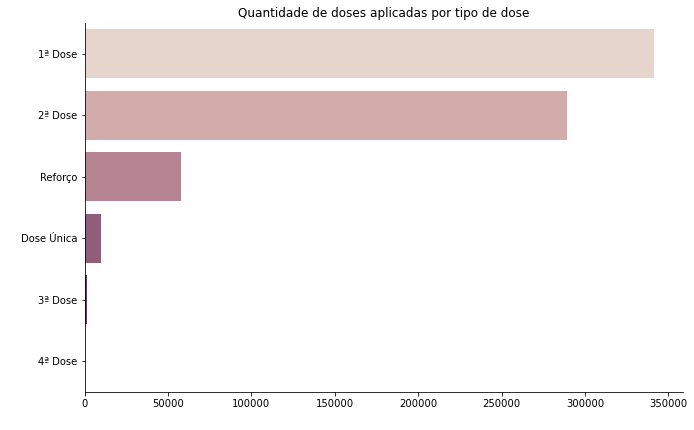

In [228]:
g1 = sea.catplot(y="dose", kind="count", palette="ch:.1", data=dados, order = dados['dose'].value_counts().index)
g1.set_axis_labels(" ", " ")
g1. figure.set_size_inches(12, 6)
plt.title('Quantidade de doses aplicadas por tipo de dose')



Quantidade de vacinas aplicadas por fabricante



Text(0.5, 1.0, 'Quantidade de vacinas aplicadas por fabricante')

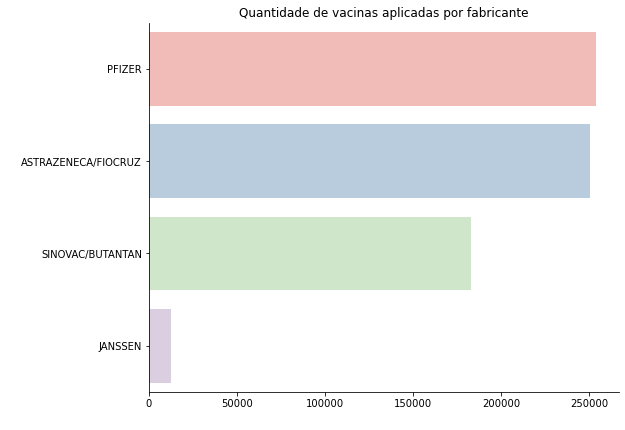

In [229]:
g2 = sea.catplot(y="nome_fabricante", kind = "count", palette="Pastel1", data=dados, order = dados['nome_fabricante'].value_counts().index)
g2.set_axis_labels(" ", " ")
g2. figure.set_size_inches(12, 6)
plt.title('Quantidade de vacinas aplicadas por fabricante')



Grafico percentual de vacinas aplicadas por fabricante



Text(0.5, 1.0, 'Percentual de vacinas aplicadas por fabricante')

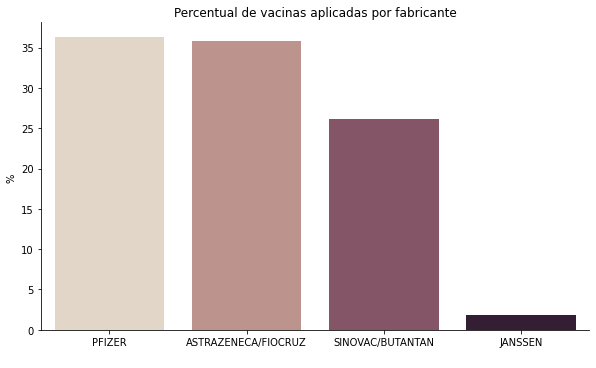

In [230]:
nome_vacina = ['PFIZER', 'ASTRAZENECA/FIOCRUZ', 'SINOVAC/BUTANTAN', 'JANSSEN']
pct_nome_vacina
dados_pct = pd.DataFrame({'fabricante': ['PFIZER', 'ASTRAZENECA/FIOCRUZ', 'SINOVAC/BUTANTAN', 'JANSSEN'],
                   'percentual': [36.31471428571428, 35.766714285714286, 26.13957142857143, 1.779]})

g3 = sea.catplot(x="fabricante", y = 'percentual', kind="bar", palette="ch:.25", data=dados_pct, orient = "v")
g3.set_axis_labels(" ", "% ")
g3. figure.set_size_inches(9, 5)
plt.title('Percentual de vacinas aplicadas por fabricante')



Quantidade de vacinas aplicadas por Estado



Text(0.5, 1.0, 'Quantidade de vacinas aplicadas por Estado')

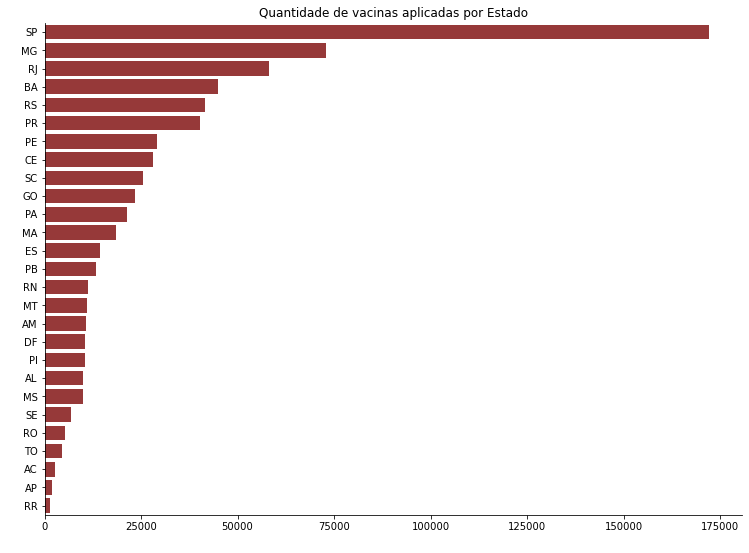

In [231]:
g4 = sea.catplot(y="sigla_uf", kind = "count", color = "brown", data=dados, order = dados['sigla_uf'].value_counts().index)
g4.set_axis_labels(" ", " ")
g4. figure.set_size_inches(12, 8)
plt.title('Quantidade de vacinas aplicadas por Estado')

Doses aplicadas por Estado x Tipo de Dose

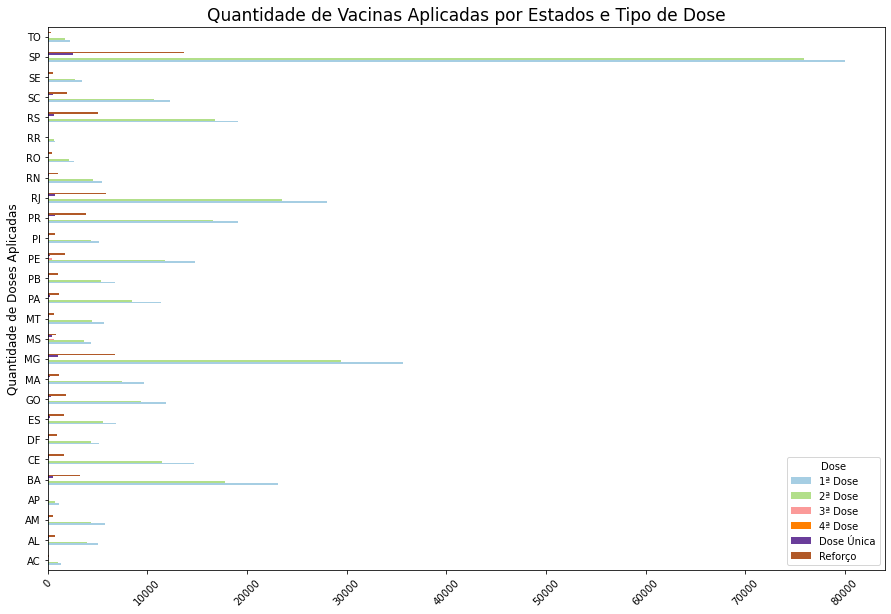

In [232]:
g5= dados.groupby(['sigla_uf', 'dose']).size()\
                .unstack().plot(figsize = (15,10), kind = 'barh', colormap = 'Paired')\
                 
                
g5.set_title("Quantidade de Vacinas Aplicadas por Estados e Tipo de Dose", fontsize = 17)
plt.xlabel("")
plt.ylabel("Quantidade de Doses Aplicadas", fontsize = 12)
plt.xticks(rotation = 45) # rotacionando label do eixo X
plt.legend(title = "Dose", fontsize = 10, loc = "lower right") # mudando título e posição da legenda

In [ ]:
Quantidade de doses totais aplicadas por dia

In [233]:
# Excluiremos as datas em que a quantidade de doses aplicadas foi zero

doses_data = doses_data.query("contagem > 1")

(array([18353., 18444., 18536., 18628., 18718., 18809., 18901., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

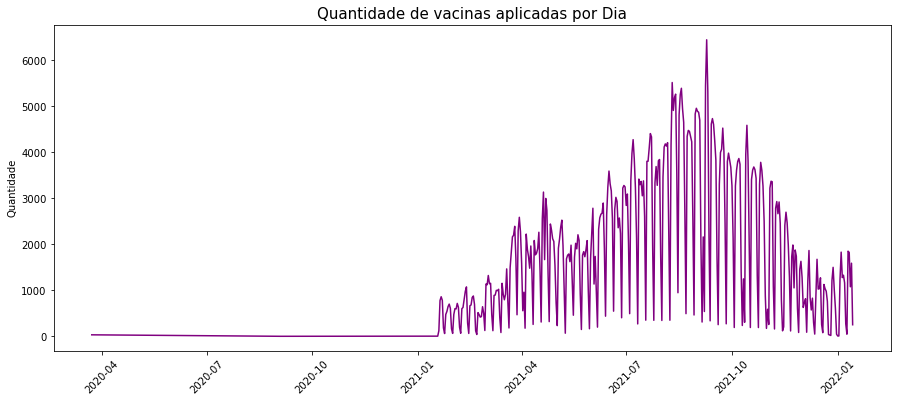

In [234]:
g6 = sea.lineplot(x = 'data_aplicacao', y ='contagem', data = doses_data, color = "purple")
g6. figure.set_size_inches(15, 6)
plt.title('Quantidade de vacinas aplicadas por Dia', fontsize = 15)
plt.ylabel('Quantidade')
plt.xlabel(' ')
plt.xticks(rotation = 45) # rotacionando label do eixo X

Vacinas aplicadas por grupo e fabricante:

Serão necessários alguns tratamentos para a plotagem deste gráfico



Para não poluir visualmente o gráfico, iremos renomear todas as categorias como "outros" exceto as duas maiores categorias da base: Comorbidades e Faixa Etária



In [235]:
categoriadic2=  {
    1 : 'Comorbidades',
    2 : 'Faixa Étaria',
    3 : 'outros',
    4 : 'outros',
    5 : 'outros',
    6 : 'outros',
    7 : 'outros',
    8: 'outros',
    9 : 'outros',
    10 : 'outros',
    11 : 'outros',
    12 : 'outros',
    13 : 'outros',
    14 : 'outros',
    15 : 'outros',
    16 : 'outros',
    21 : 'outros',
    25 : 'outros',
    94 : 'outros',
    114 : 'outros'}
  

In [236]:
# Criando novo DF apenas com variáveis de interesse

colunas_selecionada2 = ['id_paciente', 'categoria', 'nome_fabricante'] 
dados_selecionado2 = dados.filter(items = colunas_selecionada)
dados_selecionado.head()


,id_paciente,categoria,nome_fabricante,nome_categoria
0,4221bb5df1b895b7223c1031f2f71377bbb337f5b50760...,9.0,PFIZER,Trabalhadores de Saúde
1,64a596936ac94945399fa2688c4e0dec00b22809047f7a...,2.0,SINOVAC/BUTANTAN,Faixa Étaria
2,4d965708eb22efcd242dda496b77716080c01ab9038fd2...,2.0,JANSSEN,Faixa Étaria
3,95a52c776c26e81f4e856f4c2aeafc35b0c507daeea2b2...,9.0,ASTRAZENECA/FIOCRUZ,Trabalhadores de Saúde
4,0319447ca18ff545f498ee458312ce720e037a31f78780...,2.0,SINOVAC/BUTANTAN,Faixa Étaria


In [237]:
# retirando NA's

dados_selecionado2.isnull().sum() 

dados_selecionado2.dropna(inplace = True) 

In [238]:
# criando coluna com nome das categorias com base no dicionario anterior

dados_selecionado2['nome_categoria'] = [categoriadic2[i] for i in dados_selecionado2.categoria] 
dados_selecionado2.groupby('nome_categoria').size() 

nome_categoria
Comorbidades     60597
Faixa Étaria    499483
outros          138525
dtype: int64



Agora podemos criar gráfico com função .plot()

Obs: A barra invertida serve para separar linhas do código para deixá-lo mais organizado em forma de "bloco"



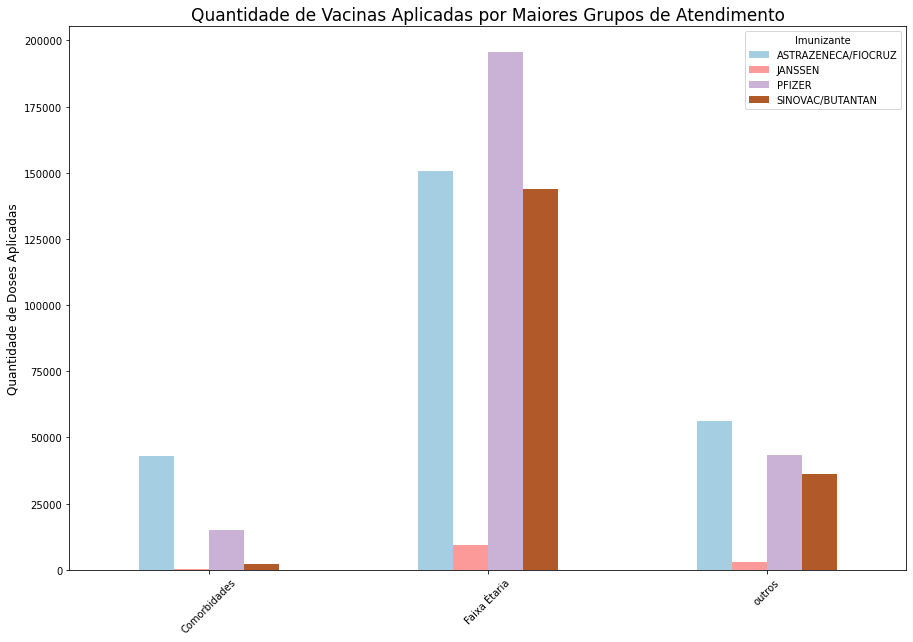

In [239]:
g7 = dados_selecionado2.filter(items = ['nome_categoria', 'nome_fabricante']).sort_index()\
                .groupby(['nome_categoria', 'nome_fabricante']).size()\
                .unstack().plot(figsize = (15,10), kind = 'bar', colormap = 'Paired')\
                 
                
g7.set_title("Quantidade de Vacinas Aplicadas por Maiores Grupos de Atendimento", fontsize = 17)
plt.xlabel("")
plt.ylabel("Quantidade de Doses Aplicadas", fontsize = 12)
plt.xticks(rotation = 45) # rotacionando label do eixo X
plt.legend(title = "Imunizante", fontsize = 10, loc = "upper right") # mudando título, fonte e posição das legendas
plt.savefig('1.pdf', format = 'pdf', dpi = 200, bbox_inches='tight')

# Explicando parametros: 
# unstack separa os grupos em barras proprias
# figsize altera tamanho do grafico
# kind muda o tipo de geometria do grafico

# Conclusões:

1. Dos nossos dados filtrados, o imunizante Pfizer figura com maior quantidade de doses aplicadas;
2. O Estado de São Paulo aplicou a maior quantidade de vacinas, seguido de Minas Gerais;
3. A maior parte das aplicações foram para o grupo de 1º Dose, seguido de perto pelo grupo de 2º dose;
4. É possível verificar uma tendência de queda na vacinação a partir de setembro de 2022;
5. No geral, Pfizer foi mais aplicada nos grupos de prioridade por "Faixa etária", enquanto que para os grupos de "Comorbidades" e "Outros" o imunizante mais aplicado foi Astrazeneca.